In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
import sklearn
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv("creditcard.csv")
print(data.shape)
print(data.head())

(284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V

In [4]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.175161e-15  3.384974e-16 -1.379537e-15  2.094852e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.021879e-15  1.494498e-15 -5.620335e-16  1.149614e-16 -2.414189e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [7]:
fraud_data=data[data['Class']==1]
valid_data=data[data['Class']==0]
outlier=len(fraud_data)/float(len(valid_data))*100
print('outlier perecentage: ',outlier*100)
print('Fraud cases: {}'.format(len(data[data['Class']==1])))
print('valid cases: {}'.format(len(data[data['Class']==0])))


outlier perecentage:  17.304750013189597
Fraud cases: 492
valid cases: 284315


In [8]:
print('Amount details of fraud transactions')
fraud_data['Amount'].describe()

Amount details of fraud transactions


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [9]:
print('Valid transactions data')
valid_data['Amount'].describe()

Valid transactions data


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

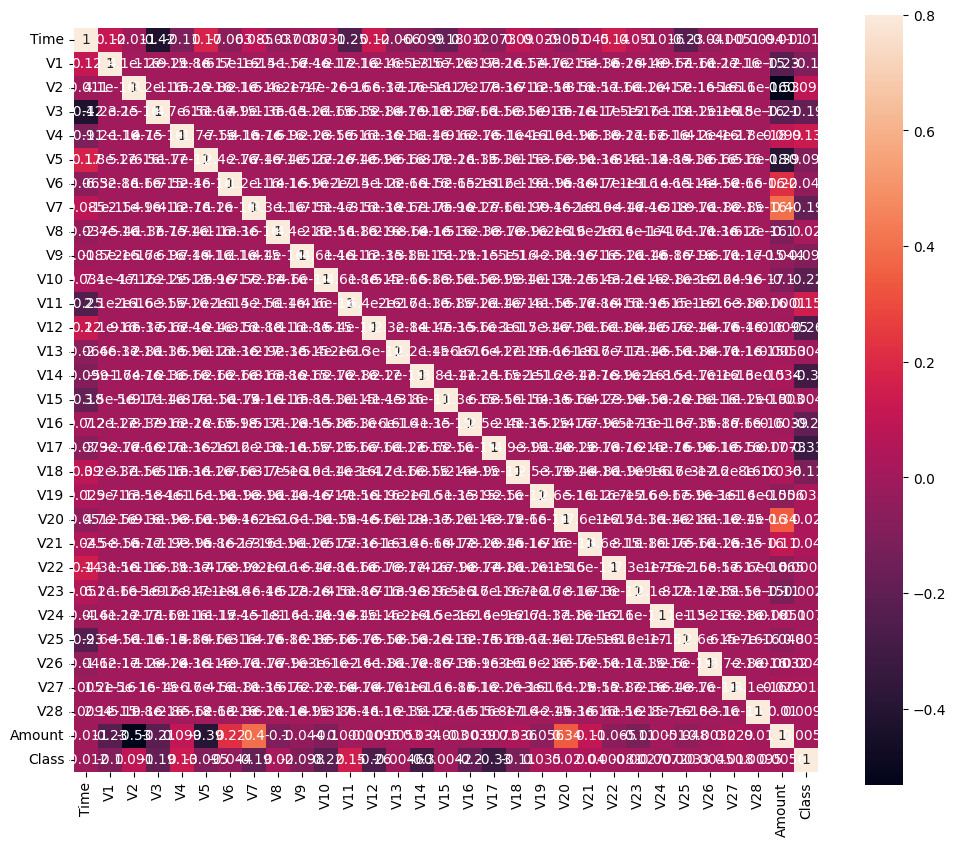

In [10]:
cormatrix=data.corr()
fig=plt.figure(figsize=(12,10))
sns.heatmap(cormatrix,vmax=0.8,square=True,annot=True)
plt.show()

(284807, 30)
(284807,)
Model Evaluation Metrics:
Accuracy: 0.9996
Precision: 0.9750
Recall: 0.7959
F1-Score: 0.8764
Matthews Correlation Coefficient: 0.8807


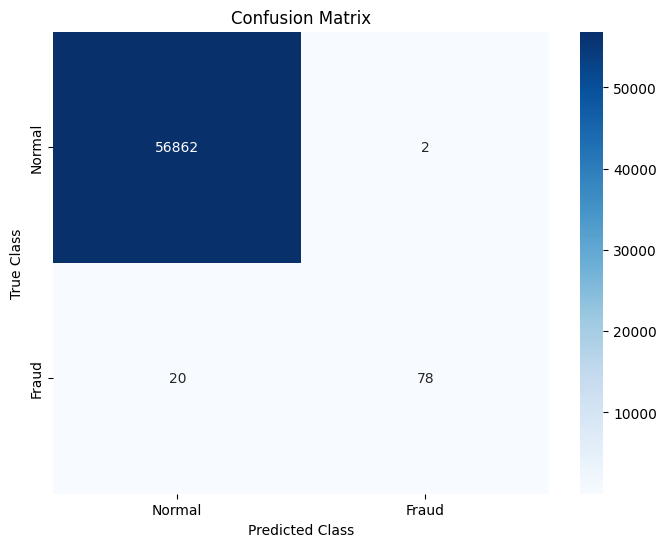

In [15]:
X=data.drop(['Class'],axis=1)
Y=data['Class']
print(X.shape)
print(Y.shape)
datax=X.values
datay=Y.values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(datax,datay,test_size=0.2,random_state=42)
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
yPred=model.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix 
accuracy = accuracy_score(y_test, yPred)
precision = precision_score(y_test, yPred)
recall = recall_score(y_test, yPred)
f1 = f1_score(y_test, yPred)
mcc = matthews_corrcoef(y_test, yPred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

conf_matrix = confusion_matrix(y_test, yPred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()
